In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('measurements2.xlsx', engine='openpyxl')
data.head(5)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [4]:
pd.DataFrame((data.isna().sum() / len(data)) * 100)

,0
distance,0.000000
consume,0.000000
speed,0.000000
temp_inside,3.092784
temp_outside,0.000000
specials,76.030928
gas_type,0.000000
AC,0.000000
rain,0.000000
sun,0.000000


In [5]:
data['temp_inside'].value_counts(dropna=False)

21.5    133
22.0    102
22.5     59
20.0     25
21.0     13
23.0     13
NaN      12
25.0     12
24.5      7
20.5      4
24.0      3
23.5      2
25.5      2
19.0      1
Name: temp_inside, dtype: int64

In [6]:
data['specials'].value_counts(dropna=False)

NaN                   295
rain                   32
sun                    27
AC rain                 9
ac                      8
AC                      6
snow                    3
sun ac                  3
AC snow                 1
half rain half sun      1
AC sun                  1
AC Sun                  1
ac rain                 1
Name: specials, dtype: int64

In [7]:
data['specials'].fillna("Nothing Special", inplace = True) #filling with nothing special

In [8]:
data['specials'].value_counts(dropna=False)

Nothing Special       295
rain                   32
sun                    27
AC rain                 9
ac                      8
AC                      6
snow                    3
sun ac                  3
AC snow                 1
half rain half sun      1
AC sun                  1
AC Sun                  1
ac rain                 1
Name: specials, dtype: int64

In [9]:
data['refill liters'].value_counts(dropna=False)

NaN     375
45.0      2
37.7      2
39.0      2
37.6      1
38.0      1
38.3      1
10.0      1
41.0      1
37.0      1
37.2      1
Name: refill liters, dtype: int64

In [10]:
data['refill gas'].value_counts(dropna=False)

NaN     375
SP98      8
E10       5
Name: refill gas, dtype: int64

In [11]:
data['refill liters'].fillna(0, inplace = True) #filling with 0
data['refill gas'].fillna('no refills', inplace = True) #filling with no refills

In [12]:
data['refill gas'].value_counts(dropna=False)

no refills    375
SP98            8
E10             5
Name: refill gas, dtype: int64

In [13]:
data.isna().sum()

distance          0
consume           0
speed             0
temp_inside      12
temp_outside      0
specials          0
gas_type          0
AC                0
rain              0
sun               0
refill liters     0
refill gas        0
dtype: int64

In [14]:
data.dropna(inplace=True) #dropping rows with nans 

In [15]:
data['price']= np.where(data['gas_type']=='SP98', 1.459, 1.379)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 387
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       376 non-null    float64
 1   consume        376 non-null    float64
 2   speed          376 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   376 non-null    int64  
 5   specials       376 non-null    object 
 6   gas_type       376 non-null    object 
 7   AC             376 non-null    int64  
 8   rain           376 non-null    int64  
 9   sun            376 non-null    int64  
 10  refill liters  376 non-null    float64
 11  refill gas     376 non-null    object 
 12  price          376 non-null    float64
dtypes: float64(5), int64(5), object(3)
memory usage: 41.1+ KB


In [17]:
grouped_data = data[['refill gas', 'refill liters']].groupby('refill gas').sum()

<AxesSubplot:xlabel='refill gas'>

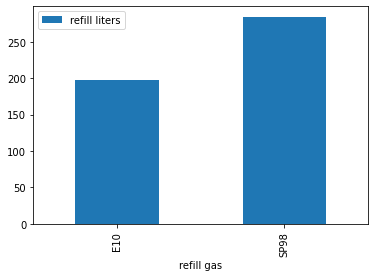

In [18]:
grouped_data.drop('no refills', axis=0).plot(kind='bar')

In [19]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,price
0,28.0,5.0,26,21.5,12,Nothing Special,E10,0,0,0,45.0,E10,1.379
1,12.0,4.2,30,21.5,13,Nothing Special,E10,0,0,0,0.0,no refills,1.379
2,11.2,5.5,38,21.5,15,Nothing Special,E10,0,0,0,0.0,no refills,1.379
3,12.9,3.9,36,21.5,14,Nothing Special,E10,0,0,0,0.0,no refills,1.379
4,18.5,4.5,46,21.5,15,Nothing Special,E10,0,0,0,0.0,no refills,1.379


<AxesSubplot:xlabel='specials'>

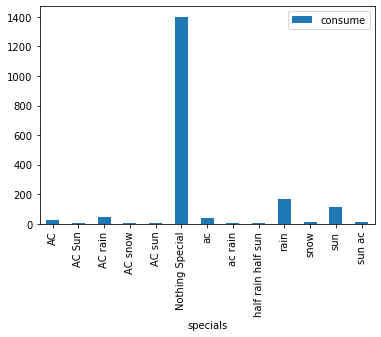

In [20]:
data[['specials', 'consume']].groupby('specials').sum().plot(kind='bar')

In [21]:
grouped_data_ac = data[['AC', 'consume','speed', 'temp_inside', 'temp_outside', 'distance']].groupby('AC').mean()

In [22]:
grouped_data_gas = data[['gas_type', 'consume', 'distance']].groupby('gas_type').sum()

<AxesSubplot:xlabel='gas_type'>

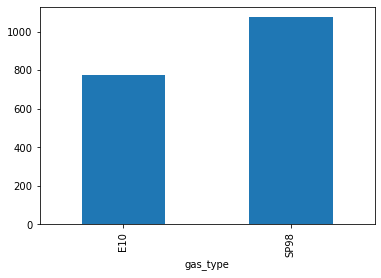

In [23]:
grouped_data_gas['consume'].plot(kind='bar')

In [24]:
grouped_data_gas

,consume,distance
gas_type,,
E10,777.3,3312.0
SP98,1074.6,4131.8


<AxesSubplot:xlabel='gas_type'>

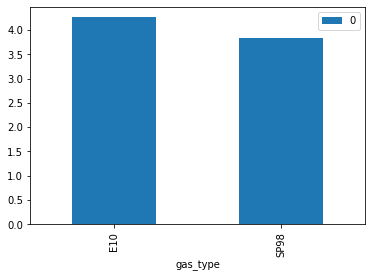

In [25]:
pd.DataFrame(grouped_data_gas['distance'] / grouped_data_gas['consume']).plot(kind='bar')

E10 travels more distance for each litre compared to SP98 and its cheaper. Next we will look at whether the consumption is stastically different.

<AxesSubplot:>

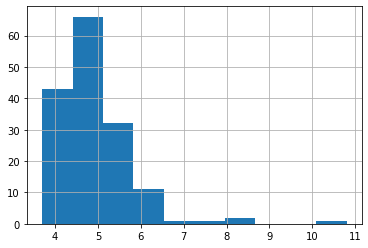

In [26]:
data[data['gas_type'] == 'E10']['consume'].hist()

<AxesSubplot:>

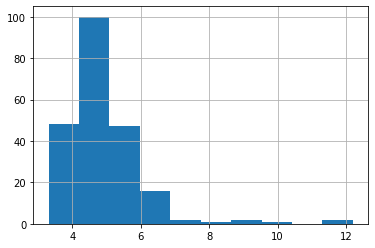

In [27]:
data[data['gas_type'] == 'SP98']['consume'].hist()

In [28]:
grouped_data_gas['consume']

gas_type
E10      777.3
SP98    1074.6
Name: consume, dtype: float64

# Hypothesis testing

- H1- mean for consumption in E10 is statistically different from mean consumption in SP98 (4.906849)
- H0- mean for consumption in E10 is statistically not different from consumption in SP98 (4.906849)

In [29]:
group1 = data[data['gas_type'] == 'E10']['consume']

In [30]:
from scipy.stats import ttest_1samp

stat, pval = ttest_1samp(group1, 4.906849)
print('stat is  ', stat)
print('pvalue for the two-tailed test is ', pval)
if pval < 0.05:
    print('reject null hypothesis')
else:
    print('cannot reject null hypothesis')

stat is   0.6154414580435263
pvalue for the two-tailed test is  0.5391600290652059
cannot reject null hypothesis


We cannot reject null hypothesis, so the mean is statistically not different form consumption in SP98. 

## Random Forest Model

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [32]:
X = data[['distance', 'speed', 'consume', 'temp_inside', 'temp_outside']]
y = data['gas_type']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [34]:
X_test.shape

(94, 5)

In [35]:
y_test.shape

(94,)

In [36]:
model = RandomForestClassifier(max_depth=5)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [37]:
model.score(X_test, y_test)

0.6276595744680851

In [38]:
model.score(X_train, y_train)

0.8262411347517731

In [39]:
pred = model.predict(X_test)
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

         E10       0.64      0.48      0.55        44
        SP98       0.62      0.76      0.68        50

    accuracy                           0.63        94
   macro avg       0.63      0.62      0.62        94
weighted avg       0.63      0.63      0.62        94



<BarContainer object of 5 artists>

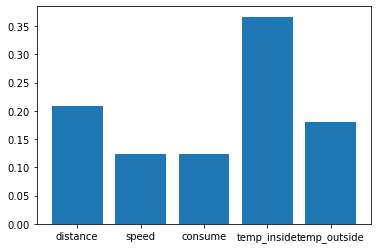

In [40]:
import matplotlib.pyplot as plt

plt.bar(X_train.columns, model.feature_importances_)

Temperature inside is the most important feature for the model